In [6]:
import os
import json
import pandas as pd
if os.getcwd() != '/home/jupyter/crisp':
    os.chdir("..")
%pwd

'/home/jupyter/crisp'

In [7]:
from main import run
from utils.gcp_helpers import get_dataframe_from_bucket

In [8]:
GSE1_only_file = "data/mouse_crisp_input_GSE124612.pkl"
one_norm_file = "data/mouse_crisp_input.pkl"
three_norms_file = "data/mouse_crisp_input_normalised_per_group.pkl"
verbose = 0
output_data_regime = 'binary' #'real-valued'

In [9]:
data_dic = {'GSE1_only_file': "data/mouse_crisp_input_GSE124612.pkl",
            'one_norm_file': "data/mouse_crisp_input.pkl", 
            'three_norms_file': "data/mouse_crisp_input_normalised_per_group.pkl"}

In [ ]:
for key in data_dic.keys():
    try:
        os.mkdir('results/'+key+'/')
    except Exception as e:
        print(e)
    
    merged_data_columns = pd.read_pickle(data_dic[key]).columns
    
    # define config
    config = {
        "name": "Example Experiment for AH casual ensemble",
        "short_name": "ah_experiment_notebook",
        "bucket_project": "fdl-us-astronaut-health",
        "bucket_name": "ah_21_data",
        "bucket_path": "gs://ah_21_data",
        "verbose": verbose,
        "test_val_split": [0.1, 0.1],
        "per_variant_experiment": False,
        "data_options": {
            #'dataset_fp': '../data/test_multiclass.pkl',
            'synthetic_train_test_split' : False,
            #'dataset_fp' : outfile,
            #'dataset_fp_train' : outfile_train,
           # 'dataset_fp_test' : outfile_test,
            'dataset_fp' : data_dic[key],
            'output_data_regime' : output_data_regime,
            'subject_keys': 'sample',
            'targets': ['irradiated'], #['dose_Gy'],
            #'predictors': ['All'],
            'predictors': list(merged_data_columns[9:]),
            'environments': ['timepoint_hr'],
            'exclude': ['organism', 'gender', 'strain', 'radiation', 'dose_Gy']
        },
        "feature_selection_options": {
            "max_features": 20,
            "verbose": verbose,
            "seed": 12,
            "variance_threshold" : 0.25, # actually std
        },
        "ensemble_options": {
            "models": ["IRM","ICP","LIRM"],#, "ICP",], # "DCF", "LIRM", "NLICP"],
            "LIRM" : {
                "use_icp_initialization": False,
                "verbose": verbose,
                "n_iterations": 1000,
                "seed": 0,
                "lr": 0.001,
                "cuda": False,
                "output_data_regime" : output_data_regime,
            },
            "DCF" : {
                "minP": 0.1,
                "maxP": 0.9,
                "minFeatures": 1,
                "minAccuracy": 0.5,
                "seed": 0,
                "verbose": verbose,
                "target": ["Target"],
                "output_pvals": False,
                "output_data_regime" : output_data_regime,
            },
            "NLICP" : {
                "max_set_size": 2,
                "alpha": 0.05,
                "seed": 12,
                "verbose": verbose,
                "method": "MLP",
                "hidden_dim": 256,
                "output_data_regime" : output_data_regime,
            },
            "LICP" : {
                "max_set_size": 2,
                "alpha": 0.05,
                "seed": 12,
                "verbose": verbose,
                "output_data_regime" : output_data_regime,
            },
        },
         "use_cloud":False,
        "results_directory": "results/"+key+'/'
        }
    print(config['results_directory'])
    run(config)

[Errno 17] File exists: 'results/GSE1_only_file/'
results/GSE1_only_file/
Running Ensemble with the following models:  ['IRM', 'ICP', 'LIRM']


/home/jupyter/crisp/utils/CorrelationToTarget.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  all_x = np.array(all_x)
/home/jupyter/crisp/utils/CorrelationToTarget.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  all_y = np.array(all_y)


Checking for features with zero variance
variance threshold is 0.25
Running correlation analysis
Running IRM (Feature Reduction Mode)
NLIRM using MLP
0               0.46098         0.82606         0.00652      
100             0.09393         0.96005         0.00443      
200             0.11924         0.95543         2.14331e-08  
300             0.11639         0.95543         1.73166e-09  
400             0.11357         0.96019         6.18307e-10  
500             0.11154         0.96019         9.55151e-10  
600             0.11011         0.96019         9.26804e-10  
700             0.10903         0.96019         1.02611e-09  
800             0.10815         0.96019         1.07767e-09  
900             0.10739         0.96019         1.07068e-09  
Finished Non Linear IRM
Keeping: ['Ifna13', 'Saa2', 'Dexi', 'Saa1', 'Mt2', 'Fabp2', '4930523O13Rik', 'Saa3', 'Itih4', 'Amy1', 'Apoc2', 'Mt1', 'Ada', 'Hp', 'Cabp5', 'Muc13', 'Sts', 'S100a9', 'Adam8', 'Krt20']
Testing  211  permutat

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished Linear IRM
Running IRM
NLIRM using deep MLP2
0               1.27836         0.31817         0.60068      
100             0.36693         0.88456         0.00680      
200             0.37083         0.88456         0.00285      
300             0.36318         0.88456         0.00176      
400             0.34707         0.88456         0.00370      
500             0.34785         0.88456         0.00092      
600             0.34827         0.88456         0.00045      
700             0.35019         0.88456         0.00183      
800             0.35535         0.88456         0.00213      
900             0.39737         0.88456         0.00070      
Finished IRM
Processing Non Linear IRM (Feature Reduction Mode)
Processing Linear ICP
Processing Linear IRM
Processing Non-Linear IRM
results/one_norm_file/
Running Ensemble with the following models:  ['IRM', 'ICP', 'LIRM']


/home/jupyter/crisp/utils/CorrelationToTarget.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  all_x = np.array(all_x)
/home/jupyter/crisp/utils/CorrelationToTarget.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  all_y = np.array(all_y)


Checking for features with zero variance
variance threshold is 0.25
Running correlation analysis
Running IRM (Feature Reduction Mode)
NLIRM using MLP
0               1.12528         0.20861         0.29968      
100             0.22013         0.90007         0.00643      
200             0.26015         0.84464         4.75960e-08  
300             0.25783         0.85737         1.96830e-09  
400             0.25523         0.86144         1.30505e-09  
500             0.25242         0.86144         6.36380e-10  
600             0.24959         0.86352         3.72009e-10  
700             0.24712         0.86560         4.10583e-10  
800             0.24505         0.86560         4.97886e-10  
900             0.24326         0.86977         5.67484e-10  
Finished Non Linear IRM
Keeping: ['Txk', 'Mt2', 'Gpd2', 'Saa2', 'Dexi', 'Fabp2', 'Arhgef17', 'Brd2', 'Mt1', 'Saa3', 'Saa1', 'Zfp36l3', 'Prap1', 'E1A_r60_n11', 'Orm1', '4930523O13Rik', 'Anpep', 'Ada', 'Pigr', 'Alox15']
Testing  211

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished Linear IRM
Running IRM
NLIRM using deep MLP2
0               0.79435         0.55401         0.06651      
100             0.39037         0.83898         0.00580      
200             0.39280         0.83898         0.00140      
300             0.39699         0.83898         0.00299      
400             0.40920         0.83898         0.00027      
500             0.39621         0.83898         0.00087      
600             0.38931         0.83898         0.00096      
700             0.39272         0.83898         0.00162      
800             0.36472         0.83898         0.00048      
900             0.38897         0.83898         0.00051      
Finished IRM
Processing Non Linear IRM (Feature Reduction Mode)
Processing Linear ICP
Processing Linear IRM
Processing Non-Linear IRM
results/three_norms_file/
Running Ensemble with the following models:  ['IRM', 'ICP', 'LIRM']


/home/jupyter/crisp/utils/CorrelationToTarget.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  all_x = np.array(all_x)
/home/jupyter/crisp/utils/CorrelationToTarget.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  all_y = np.array(all_y)


Checking for features with zero variance
variance threshold is 0.25
Running correlation analysis
Running IRM (Feature Reduction Mode)
NLIRM using MLP
0               0.65394         0.69865         0.07327      
100             0.13810         0.95453         0.00944      
200             0.18133         0.89680         2.49077e-05  
300             0.18162         0.90086         9.14047e-10  
400             0.18148         0.90086         9.92762e-10  
500             0.18132         0.90086         9.12663e-10  
600             0.18114         0.90086         9.16928e-10  
700             0.18095         0.90086         9.10835e-10  
800             0.18075         0.90086         9.93014e-10  
900             0.18054         0.90086         9.88728e-10  
Finished Non Linear IRM
Keeping: ['Fth1', 'Ftl1', 'Snca', 'Mb', 'Slc25a37', 'Gnaz', '4932422M17Rik', 'Olfr32', 'Fbln1', 'Pnliprp1', 'Olfr544', 'Kctd14', 'Glrx2', 'Acot7', '2810453I06Rik', '4930502C15Rik', 'Insm1', 'Clca6', 'Hbb-b1

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Finished ICP
Running Linear IRM
Start IRM training procedure with binary target


In [10]:
print(type(to_bucket_results))

<class 'list'>


In [24]:
dic = to_bucket_results[0]

In [27]:
# print each of the bits in to_buket_results
for k in dic.keys():
    print(k, type(dic[k]))

test_logits <class 'list'>
method <class 'str'>
features <class 'list'>
coefficients <class 'list'>
pvals <class 'NoneType'>
test_acc <class 'torch.Tensor'>
test_acc_std <class 'float'>
coefficient_correlation_matrix <class 'list'>


In [36]:
# code is storing absolutely giant correlation matrices. do we need these multiple times?



AttributeError: 'float' object has no attribute 'tolist'

In [24]:
from dataio.datasets import get_datasets_for_experiment
environment_datasets, val_dataset, test_dataset = get_datasets_for_experiment(config)

Running a per sample experiment
Loaded  6  train environments
Env  0  has  15  samples
X shape  (15, 16353)  y shape  (15, 1)
Env  1  has  82  samples
X shape  (82, 16353)  y shape  (82, 1)
Env  2  has  39  samples
X shape  (39, 16353)  y shape  (39, 1)
Env  3  has  38  samples
X shape  (38, 16353)  y shape  (38, 1)
Env  4  has  40  samples
X shape  (40, 16353)  y shape  (40, 1)
Env  5  has  41  samples
X shape  (41, 16353)  y shape  (41, 1)
Loaded test set, X shape: (31, 16353)  y shape:  (31, 1)


In [25]:
# Reinitialise datasets without zero variance columns
from dataio.datasets import get_datasets_for_experiment
environment_datasets, val_dataset, test_dataset = get_datasets_for_experiment(config)

######################### LIST CHOSEN ENSEMBLE METHODS #############################
ensemble_options = config.get('ensemble_options', {})
data_config = config.get('data_options', {})
selection_config = config.get('feature_selection_options', {})
# Load list of models to include in ensemble, if not specified, run them all
selected_models = ensemble_options.get("models", ["ERM", "RF", "ICP", "IRM", "DCF", "LIRM", "NLICP"])
print("Running Ensemble with the following models: ", selected_models)
# Initialise empty list to store per method results to outputs to file system/ cloud storage
to_bucket_results = []

############################# FEATURE REDUCTION 1 ######################################
# 1. Remove any zero variance features
# - Save list to results directory
from utils.ZeroVarianceChecker import ZeroVarianceChecker
print('Checking for features with zero variance')
# Flag for checking zero variance across all environments ([train_environments], val, test) or within any one environment
var_args = {
    'in_each_env': selection_config.get('zero_variance_in_each_env', False),
    'variance_threshold': selection_config.get('variance_threshold',0)
}
zero_var_checker = ZeroVarianceChecker(environment_datasets, val_dataset, test_dataset, var_args)
if var_args['in_each_env']:
    zero_var_columns = zero_var_checker.zero_var_cols
    if config['verbose']:
        print('In atleast one environment the following columns had zero variance:', zero_var_columns)
    save_dict_to_json({'zero std columns removed': zero_var_columns},
                      config['results_directory'] + 'zero_std_columns.json')
else:
    zero_var_columns = zero_var_checker.zero_var_cols
    if config['verbose']:
        print('Across all environments the following columns had zero variance:', zero_var_columns)
keep_columns = zero_var_checker.reduced_feature_list()

selected_feature_list = keep_columns
config['data_options']['predictors'] = selected_feature_list
# Reinitialise datasets without zero variance columns
environment_datasets, val_dataset, test_dataset = get_datasets_for_experiment(config)

Running a per sample experiment
Loaded  6  train environments
Env  0  has  15  samples
X shape  (15, 16353)  y shape  (15, 1)
Env  1  has  82  samples
X shape  (82, 16353)  y shape  (82, 1)
Env  2  has  39  samples
X shape  (39, 16353)  y shape  (39, 1)
Env  3  has  38  samples
X shape  (38, 16353)  y shape  (38, 1)
Env  4  has  40  samples
X shape  (40, 16353)  y shape  (40, 1)
Env  5  has  41  samples
X shape  (41, 16353)  y shape  (41, 1)
Loaded test set, X shape: (31, 16353)  y shape:  (31, 1)
Running Ensemble with the following models:  ['IRM']
Checking for features with zero variance
variance threshold is 0.25
Across all environments the following columns had zero variance: ['0610005C13Rik', '0610007C21Rik', '0610007L01Rik', '0610007P08Rik', '0610007P14Rik', '0610007P22Rik', '0610008F07Rik', '0610009B22Rik', '0610009D07Rik', '0610009K14Rik', '0610009O20Rik', '0610010F05Rik', '0610010K14Rik', '0610010O12Rik', '0610011L14Rik', '0610012G03Rik', '0610012H03Rik', '0610030E20Rik', '061

In [26]:
# Reinitialise datasets without zero variance columns
#from dataio.datasets import get_datasets_for_experiment
#environment_datasets, val_dataset, test_dataset = get_datasets_for_experiment(config)

######################### LIST CHOSEN ENSEMBLE METHODS #############################
##ensemble_options = config.get('ensemble_options', {})
#data_config = config.get('data_options', {})
#selection_config = config.get('feature_selection_options', {})
# Load list of models to include in ensemble, if not specified, run them all
#selected_models = ensemble_options.get("models", ["ERM", "RF", "ICP", "IRM", "DCF", "LIRM", "NLICP"])
#print("Running Ensemble with the following models: ", selected_models)
# Initialise empty list to store per method results to outputs to file system/ cloud storage
#to_bucket_results = []

# 2. Correlation Analysis
# - for pairs of features with high correlation, remove one of each pair
from models.Investigate_Correlation import Correlation
print('Running correlation analysis')
corr_args = {
    "correlation_threshold": selection_config.get("correlation_threshold", 0.97),
    "seed": selection_config.get("seed", 12),
    "verbose": selection_config.get("verbose", 0),
    "columns": test_dataset.predictor_columns,
    "target": data_config['targets'],
    "save_plot": selection_config.get('plot_correlation', False),
    "fname": config['results_directory']
}

Running correlation analysis


In [ ]:
# corr = Correlation(environment_datasets, val_dataset, test_dataset, corr_args)

In [28]:
corr_results_dict = corr.predictor_results()

In [29]:
keep_columns = corr_results_dict["results"]['retained_columns']
column_pairs_df = corr_results_dict["results"]['invariant_correlations']

selected_feature_list = keep_columns
original_dimensionality = len(selected_feature_list)
config['data_options']['predictors'] = selected_feature_list
# Reinitialise datasets without highly correlated feature pairs
environment_datasets, val_dataset, test_dataset = get_datasets_for_experiment(config)

Running a per sample experiment
Loaded  6  train environments
Env  0  has  15  samples
X shape  (15, 1315)  y shape  (15, 1)
Env  1  has  82  samples
X shape  (82, 1315)  y shape  (82, 1)
Env  2  has  39  samples
X shape  (39, 1315)  y shape  (39, 1)
Env  3  has  38  samples
X shape  (38, 1315)  y shape  (38, 1)
Env  4  has  40  samples
X shape  (40, 1315)  y shape  (40, 1)
Env  5  has  41  samples
X shape  (41, 1315)  y shape  (41, 1)
Loaded test set, X shape: (31, 1315)  y shape:  (31, 1)


Running a per sample experiment
Loaded  6  train environments
Env  0  has  15  samples
X shape  (15, 1315)  y shape  (15, 1)
Env  1  has  82  samples
X shape  (82, 1315)  y shape  (82, 1)
Env  2  has  39  samples
X shape  (39, 1315)  y shape  (39, 1)
Env  3  has  38  samples
X shape  (38, 1315)  y shape  (38, 1)
Env  4  has  40  samples
X shape  (40, 1315)  y shape  (40, 1)
Env  5  has  41  samples
X shape  (41, 1315)  y shape  (41, 1)
Loaded test set, X shape: (31, 1315)  y shape:  (31, 1)
Running Ensemble with the following models:  ['IRM']


/home/jupyter/crisp/utils/CorrelationToTarget.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  all_x = np.array(all_x)
/home/jupyter/crisp/utils/CorrelationToTarget.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  all_y = np.array(all_y)


Checking for features with zero variance
variance threshold is 0.25
Across all environments the following columns had zero variance: []
Running a per sample experiment
Loaded  6  train environments
Env  0  has  15  samples
X shape  (15, 1315)  y shape  (15, 1)
Env  1  has  82  samples
X shape  (82, 1315)  y shape  (82, 1)
Env  2  has  39  samples
X shape  (39, 1315)  y shape  (39, 1)
Env  3  has  38  samples
X shape  (38, 1315)  y shape  (38, 1)
Env  4  has  40  samples
X shape  (40, 1315)  y shape  (40, 1)
Env  5  has  41  samples
X shape  (41, 1315)  y shape  (41, 1)
Loaded test set, X shape: (31, 1315)  y shape:  (31, 1)
Running correlation analysis
Intersection: []
Running a per sample experiment
Loaded  6  train environments
Env  0  has  15  samples
X shape  (15, 1315)  y shape  (15, 1)
Env  1  has  82  samples
X shape  (82, 1315)  y shape  (82, 1)
Env  2  has  39  samples
X shape  (39, 1315)  y shape  (39, 1)
Env  3  has  38  samples
X shape  (38, 1315)  y shape  (38, 1)
Env  4  

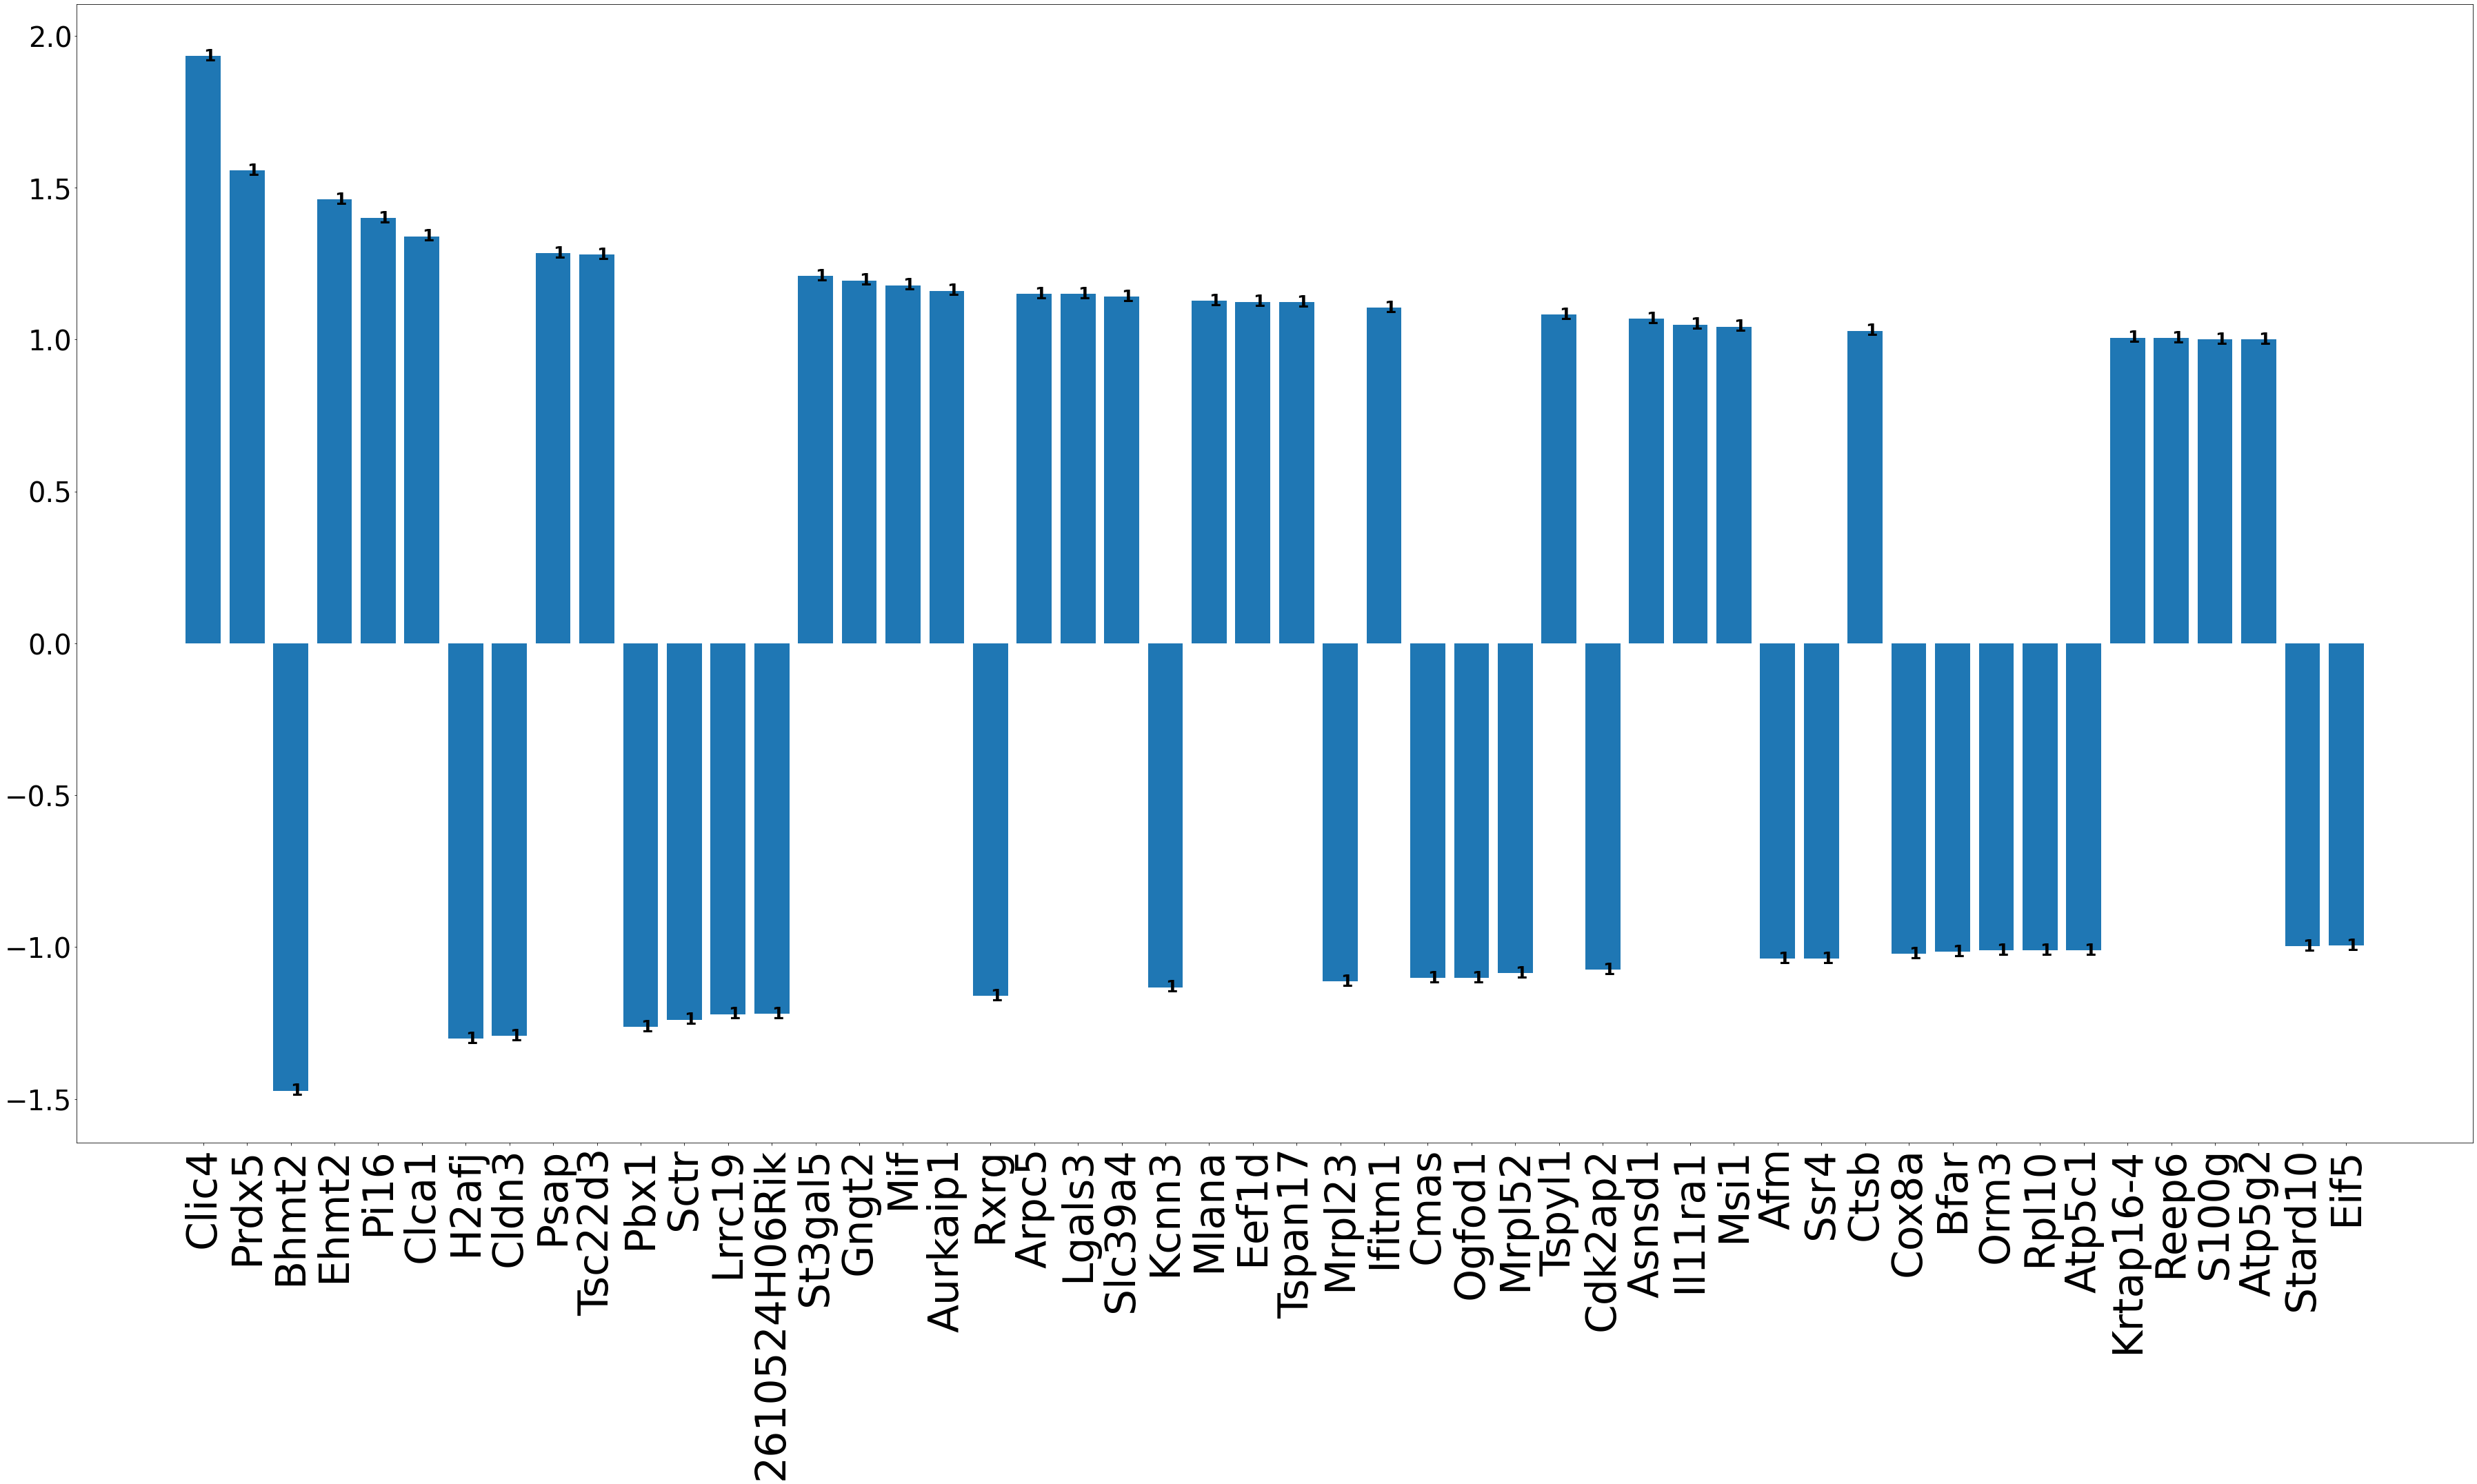

In [30]:
run(config)